book: Machine Learning with R, second edition. Brett Lantz. packt. Chapter 4.

## Data

In [2]:
sms_raw <- read.csv("sms_spam.csv", stringsAsFactors = FALSE)
str(sms_raw)

'data.frame':	5559 obs. of  2 variables:
 $ type: chr  "ham" "ham" "ham" "spam" ...
 $ text: chr  "Hope you are having a good week. Just checking in" "K..give back my thanks." "Am also doing in cbe only. But have to pay." "complimentary 4 STAR Ibiza Holiday or £10,000 cash needs your URGENT collection. 09066364349 NOW from Landline "| __truncated__ ...


convert **type** to *factor*:

In [4]:
sms_raw$type <- factor(sms_raw$type)
str(sms_raw$type)
table(sms_raw$type)

 Factor w/ 2 levels "ham","spam": 1 1 1 2 2 1 1 1 2 1 ...



 ham spam 
4812  747 

## Cleaning and standardizing text data

install and load the *tm* package:

In [6]:
install.packages("tm", quiet = TRUE)

In [8]:
library("tm")

Create a volatile corpus (corpus: collection of text documents) from `text` field:

In [10]:
sms_corpus <- VCorpus(VectorSource(sms_raw$text))
print(sms_corpus)

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 5559


Examples of extracting information from corpus:

In [11]:
inspect(sms_corpus[1:2])
as.character(sms_corpus[[1]])

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 2

[[1]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 49

[[2]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 23



[1] "Hope you are having a good week. Just checking in"

Using `lapply()` in several elements:

In [12]:
lapply(sms_corpus[1:2], as.character)

$`1`
[1] "Hope you are having a good week. Just checking in"

$`2`
[1] "K..give back my thanks."

convert all text to lowercase characters.

In [15]:
sms_corpus_clean <- tm_map(sms_corpus, content_transformer(tolower))

In [16]:
as.character(sms_corpus[[1]])
as.character(sms_corpus_clean[[1]])

[1] "Hope you are having a good week. Just checking in"

[1] "hope you are having a good week. just checking in"

Remove numbers

In [18]:
sms_corpus_clean <- tm_map(sms_corpus_clean, removeNumbers)

In [23]:
as.character(sms_corpus[[4]])
as.character(sms_corpus_clean[[4]])

[1] "complimentary 4 STAR Ibiza Holiday or £10,000 cash needs your URGENT collection. 09066364349 NOW from Landline not to lose out! Box434SK38WP150PPM18+"

[1] "complimentary  star ibiza holiday or £, cash needs your urgent collection.  now from landline not to lose out! boxskwpppm+"

Remove filler words such as to, and, but, or...

In [24]:
sms_corpus_clean <- tm_map(sms_corpus_clean, removeWords, stopwords())

In [25]:
as.character(sms_corpus[[4]])
as.character(sms_corpus_clean[[4]])

[1] "complimentary 4 STAR Ibiza Holiday or £10,000 cash needs your URGENT collection. 09066364349 NOW from Landline not to lose out! Box434SK38WP150PPM18+"

[1] "complimentary  star ibiza holiday  £, cash needs  urgent collection.  now  landline   lose ! boxskwpppm+"

Remove punctuation:

In [26]:
sms_corpus_clean <- tm_map(sms_corpus_clean, removePunctuation)

In [27]:
as.character(sms_corpus[[4]])
as.character(sms_corpus_clean[[4]])

[1] "complimentary 4 STAR Ibiza Holiday or £10,000 cash needs your URGENT collection. 09066364349 NOW from Landline not to lose out! Box434SK38WP150PPM18+"

[1] "complimentary  star ibiza holiday  £ cash needs  urgent collection  now  landline   lose  boxskwpppm"

Install *SnowballC* package, to use stemming:

In [29]:
install.packages('SnowballC', quiet = TRUE)

In [31]:
library("SnowballC")
wordStem(c("learn", "learned", "learning", "learns"))

[1] "learn" "learn" "learn" "learn"

Using stemming in our data:

In [32]:
sms_corpus_clean <- tm_map(sms_corpus_clean, stemDocument)

Now, we need to remove extra withspaces:

In [34]:
sms_corpus_clean <- tm_map(sms_corpus_clean, stripWhitespace)
lapply(sms_corpus[1:4], as.character)
lapply(sms_corpus_clean[1:4], as.character)

$`1`
[1] "Hope you are having a good week. Just checking in"

$`2`
[1] "K..give back my thanks."

$`3`
[1] "Am also doing in cbe only. But have to pay."

$`4`
[1] "complimentary 4 STAR Ibiza Holiday or £10,000 cash needs your URGENT collection. 09066364349 NOW from Landline not to lose out! Box434SK38WP150PPM18+"

$`1`
[1] "hope good week just check"

$`2`
[1] "kgive back thank"

$`3`
[1] "also cbe pay"

$`4`
[1] "complimentari star ibiza holiday £ cash need urgent collect now landlin lose boxskwpppm"

## Splitting text documents into words

First, create a DTM (Document Term Matrix) sparse matrix:

In [37]:
sms_dtm <- DocumentTermMatrix(sms_corpus_clean)

## Creating training and test datasets

In [38]:
sms_dtm_train <- sms_dtm[1:4169,]
sms_dtm_test <- sms_dtm[4170:5559,]

In [39]:
sms_train_labels <- sms_raw[1:4169, ]$type
sms_test_labels <- sms_raw[4170:5559, ]$type

Checking the proportions

In [40]:
prop.table(table(sms_train_labels))
prop.table(table(sms_test_labels))

sms_train_labels
      ham      spam 
0.8647158 0.1352842 

sms_test_labels
      ham      spam 
0.8683453 0.1316547 

## Word cloud

Install *wordcloud* package

In [41]:
install.packages('wordcloud', quiet = TRUE)

In [43]:
library('wordcloud')

Creating a word cloud:

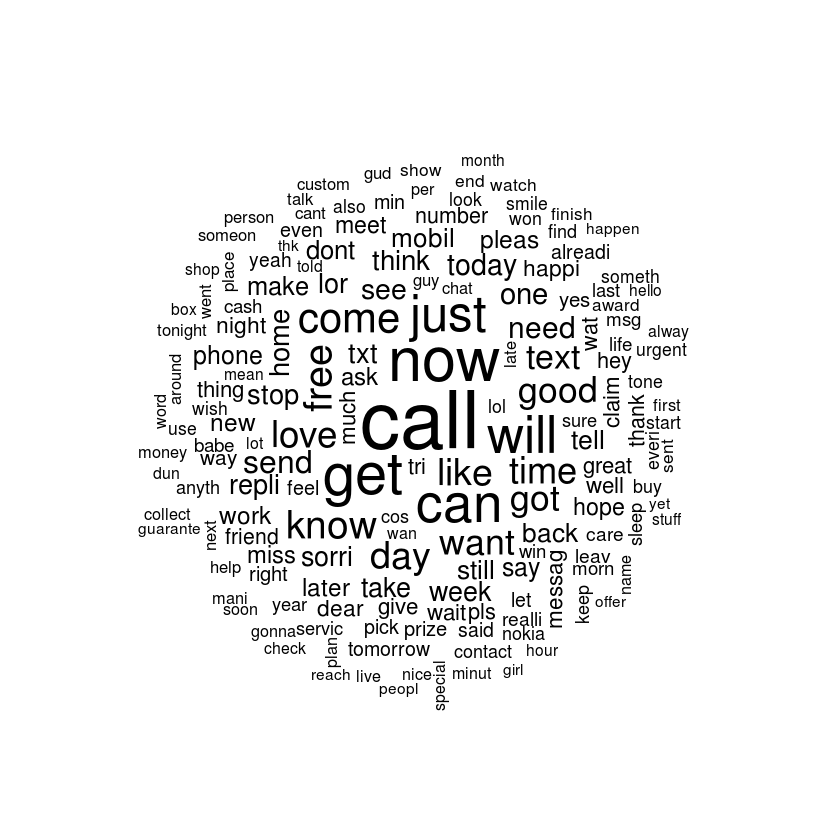

In [44]:
wordcloud(sms_corpus_clean, min.freq = 50, random.order = FALSE)

Create a subset to spam:

In [45]:
spam <- subset(sms_raw, type == "spam")

Create a subset to ham:

In [47]:
ham <- subset(sms_raw, type == "ham")

Now, create two word clouds:

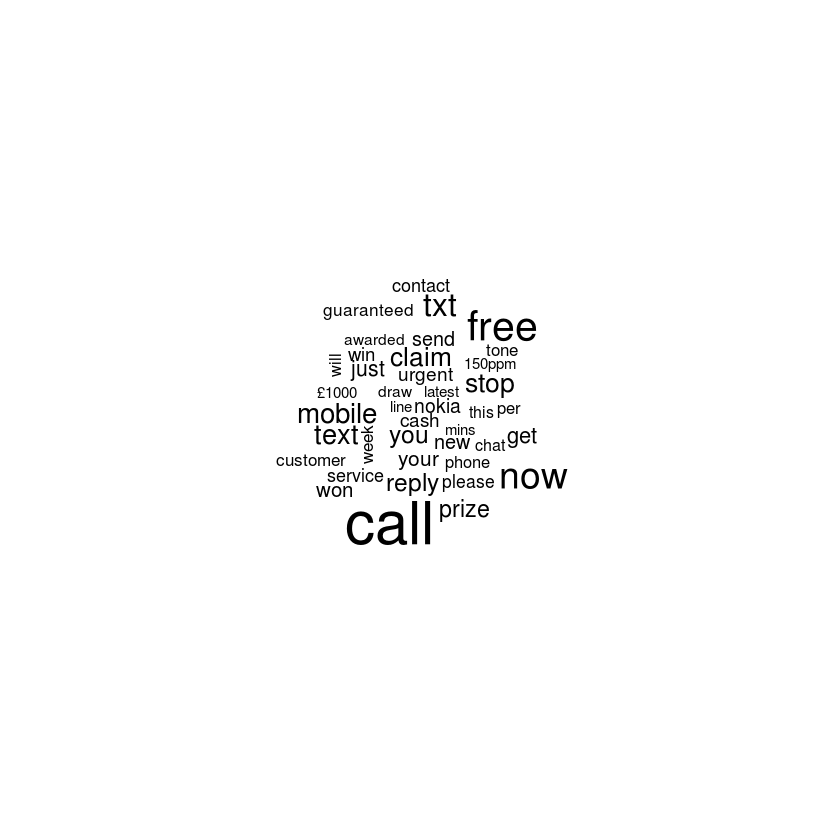

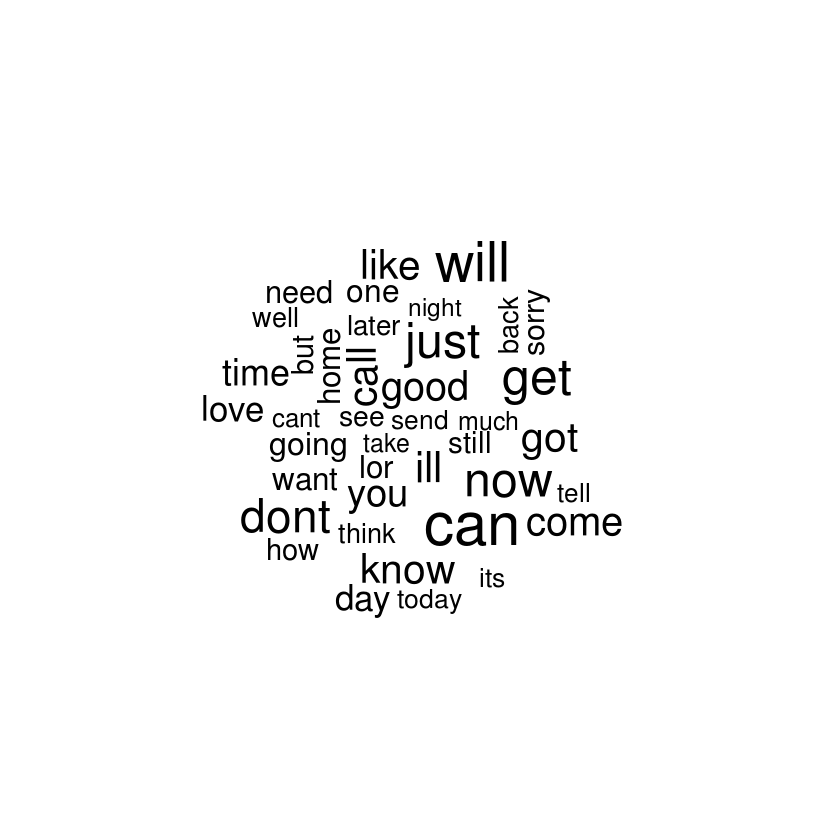

In [48]:
wordcloud(spam$text, max.words = 40, scale = c(3, 0.5))
wordcloud(ham$text, max.words = 40, scale = c(3, 0.5))

## Creating indicator features for frequent words

Find the frequenty words:

In [49]:
sms_freq_words <- findFreqTerms(sms_dtm_train, 5)
str(sms_freq_words)

 chr [1:1137] "£wk" "abiola" "abl" "abt" "accept" "access" "account" ...


Now, restrict the data to frequent words:

In [50]:
sms_dtm_freq_train <- sms_dtm_train[, sms_freq_words]
sms_dtm_freq_test <- sms_dtm_test[, sms_freq_words]

Function to convert counts to "yes" or "no" strings:

In [51]:
convert_counts <- function(x) {
    x <- ifelse(x > 0, "Yes", "No")
}

In [53]:
sms_train <- apply(sms_dtm_freq_train, MARGIN = 2, convert_counts)
sms_test <- apply(sms_dtm_freq_test, MARGIN = 2, convert_counts)

## Training a model on the data

Now we will apply the Naive Bayes algorithm.

install and loading the *e1071* package:

In [54]:
install.packages("e1071", quiet = TRUE)

In [55]:
library("e1071")

Building the model

In [56]:
sms_classifier <- naiveBayes(sms_train, sms_train_labels)

## Evaluating model performance

In [57]:
sms_test_pred <- predict(sms_classifier, sms_test)

In [58]:
library("gmodels")

In [59]:
CrossTable(sms_test_pred, sms_test_labels, prop.chisq = FALSE, prop.t = FALSE, dnn = c('predicted', 'actual'))


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|-------------------------|

 
Total Observations in Table:  1390 

 
             | actual 
   predicted |       ham |      spam | Row Total | 
-------------|-----------|-----------|-----------|
         ham |      1201 |        30 |      1231 | 
             |     0.976 |     0.024 |     0.886 | 
             |     0.995 |     0.164 |           | 
-------------|-----------|-----------|-----------|
        spam |         6 |       153 |       159 | 
             |     0.038 |     0.962 |     0.114 | 
             |     0.005 |     0.836 |           | 
-------------|-----------|-----------|-----------|
Column Total |      1207 |       183 |      1390 | 
             |     0.868 |     0.132 |           | 
-------------|-----------|-----------|-----------|

 


error:

In [60]:
36/1390

[1] 0.02589928

~ 2.6%

## Improving model performance

creating classifier with laplace estimator

In [64]:
sms_classifier2 <- naiveBayes(sms_train, sms_train_labels, laplace = 1)

In [65]:
sms_test_pred2 <- predict(sms_classifier2, sms_test)

In [66]:
CrossTable(sms_test_pred2, sms_test_labels, prop.chisq = FALSE, prop.t = FALSE, prop.r = FALSE,
           dnn = c('predicted', 'actual'))


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Col Total |
|-------------------------|

 
Total Observations in Table:  1390 

 
             | actual 
   predicted |       ham |      spam | Row Total | 
-------------|-----------|-----------|-----------|
         ham |      1202 |        28 |      1230 | 
             |     0.996 |     0.153 |           | 
-------------|-----------|-----------|-----------|
        spam |         5 |       155 |       160 | 
             |     0.004 |     0.847 |           | 
-------------|-----------|-----------|-----------|
Column Total |      1207 |       183 |      1390 | 
             |     0.868 |     0.132 |           | 
-------------|-----------|-----------|-----------|

 


Error:

In [67]:
(28+5)/1390

[1] 0.02374101

~ 2.4%